# Lead Scoring Case Study
*Identification of Hot Leads to focus more on them and thus enhancing the conversion ratio*

## Business Objective

We are required to categorize or cluster the leads as hot leads and cold leads. This is to be done by analysing past data provided by X Education Company. The Company's employee will then focus on communicating effictively with the hot leads so that most of them actually convert. We have been given a target of 80% convertion rate, and thus, in order to achieve that, we must accurately categorize the leads.



---



## Loading Libraries and global settings

In [1]:
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:

import warnings
warnings.filterwarnings('ignore')

# Improving HTML Display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Setting Pandas option
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',255)
pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_info_rows',200)
pd.set_option('display.width',200)
pd.set_option('display.html.border',1)



---



## Data Loading and Observing

In [5]:
# In Order to run locally
df_data = pd.read_csv("Leads.csv")
df_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df_data.shape


(9240, 37)

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   Prospect ID                                    object 
 1   Lead Number                                    int64  
 2   Lead Origin                                    object 
 3   Lead Source                                    object 
 4   Do Not Email                                   object 
 5   Do Not Call                                    object 
 6   Converted                                      int64  
 7   TotalVisits                                    float64
 8   Total Time Spent on Website                    int64  
 9   Page Views Per Visit                           float64
 10  Last Activity                                  object 
 11  Country                                        object 
 12  Specialization                                 o

In [9]:
df_data.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Conversion Rate for past orders
round(len(df_data[df_data['Converted']==1].index)/len(df_data.index)*100,2)

38.54



---



## Data Cleaning (Columns)

In [12]:
# Dropping duplicate rows
df_data=df_data.drop_duplicates()

In [13]:
# Replacing the value 'Select' with 'NaN' since 'Select' signifies that the person who filled the form did not selected any value
df_data = df_data.replace('Select', np.nan)
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Making list of un-usable columns, due to most NaN value (Taking an arbitrary value >20 %)
unnecessary_column = set((pd.isnull(df_data).sum()/len(df_data.index) > .2).index)

# Making list of un-necessary columns from Analysis point of view
unnecessary_column = {'Prospect ID', 'Lead Number'}

# Making list of numerical columns from Analysis point of view
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

# Making list of categorical columns from Analysis point of view
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

# Making list of Target/Output column from Analysis point of view
target_column = {'Converted'}

In [15]:
# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Newspaper Article                           0.00
Total Time Spent on Website                 0.00
Newspaper                                   0.00
X Education Forums                          0.00
Page Views Per Visit                        1.48
Converted                                   0.00
Receive More Updates About Our Courses      0.00
Do Not Call                                 0.00
Get updates on DM Content                   0.00
TotalVisits                                 1.48
A free copy of Mastering The Interview      0.00
Last Notable Activity                       0.00
Do Not Email                                0.00
Magazine                                    0.00
Through Recommendations                     0.00
Update me on Supply Chain Content           0.00
Search                                      0.00
Lead Origin                                 0.00
Digital Advertisement                       0.00
Lead Source                                 0.39
I agree to pay the a

In [16]:
# Further removing the columns which have very less variation in data
df_data[list(categorical_column)].describe()

,Newspaper Article,Newspaper,X Education Forums,Receive More Updates About Our Courses,Do Not Call,Get updates on DM Content,A free copy of Mastering The Interview,Last Notable Activity,Do Not Email,Magazine,Through Recommendations,Update me on Supply Chain Content,Search,Lead Origin,Digital Advertisement,Lead Source,I agree to pay the amount through cheque,Last Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9204,9240,9137
unique,2,2,2,1,2,1,2,16,2,1,2,1,2,5,2,21,1,17
top,No,No,No,No,No,No,No,Modified,No,No,No,No,No,Landing Page Submission,No,Google,No,Email Opened
freq,9238,9239,9239,9240,9238,9240,6352,3407,8506,9240,9233,9240,9226,4886,9236,2868,9240,3437


In [17]:
# Adding columns with negligible or no variation to unnecessary_column and removing from Dataframe since they would not serve any purpose for our analysis

# 'Get updates on DM Content' since all rows have same value, i.e. 'No'
unnecessary_column.add('Get updates on DM Content')
categorical_column.remove('Get updates on DM Content')

# 'Newspaper Article' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper Article')
categorical_column.remove('Newspaper Article')

# 'Magazine' since all rows have same value, i.e. 'No'
unnecessary_column.add('Magazine')
categorical_column.remove('Magazine')

# 'I agree to pay the amount through cheque' since all rows have same value, i.e. 'No'
unnecessary_column.add('I agree to pay the amount through cheque')
categorical_column.remove('I agree to pay the amount through cheque')

# 'Receive More Updates About Our Courses' since all rows have same value, i.e. 'No'
unnecessary_column.add('Receive More Updates About Our Courses')
categorical_column.remove('Receive More Updates About Our Courses')

# 'Update me on Supply Chain Content' since all rows have same value, i.e. 'No'
unnecessary_column.add('Update me on Supply Chain Content')
categorical_column.remove('Update me on Supply Chain Content')

# 'Newspaper' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper')
categorical_column.remove('Newspaper')

# 'Through Recommendations' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Through Recommendations')
categorical_column.remove('Through Recommendations')

# 'Search' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Search')
categorical_column.remove('Search')

# 'Do Not Call' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Do Not Call')
categorical_column.remove('Do Not Call')

# 'Digital Advertisement' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Digital Advertisement')
categorical_column.remove('Digital Advertisement')

# 'X Education Forums' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('X Education Forums')
categorical_column.remove('X Education Forums')

# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Last Notable Activity                     0.00
Do Not Email                              0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Lead Origin                               0.00
Converted                                 0.00
Lead Source                               0.39
Last Activity                             1.11
A free copy of Mastering The Interview    0.00
TotalVisits                               1.48
dtype: float64



---



## Data Cleaning (Rows)

In [18]:
# Dropping rows with most NaN value (Taking an arbitrary value >20 %)
threshold = int(.2*len(df_data.columns))
df_data.dropna(thresh=2, inplace=True)

In [19]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


Last Notable Activity                     0.00000
Do Not Email                              0.00000
Total Time Spent on Website               0.00000
Page Views Per Visit                      1.48268
Lead Origin                               0.00000
Converted                                 0.00000
Lead Source                               0.38961
Last Activity                             1.11472
A free copy of Mastering The Interview    0.00000
TotalVisits                               1.48268
dtype: float64

In [20]:
# Observing Categorical Columns
df_data[list(categorical_column)].describe()

,A free copy of Mastering The Interview,Last Notable Activity,Do Not Email,Lead Origin,Lead Source,Last Activity
count,9240,9240,9240,9240,9204,9137
unique,2,16,2,5,21,17
top,No,Modified,No,Landing Page Submission,Google,Email Opened
freq,6352,3407,8506,4886,2868,3437


In [21]:
# 'Last Activity' have 1.33841 % 'NaN' values
# Imputing values for 'Last Activity'
# Replacing 'NaN' with 'Email Opened'
df_data[['Last Activity']]=df_data[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.34116 % 'NaN' values
# Imputing values for 'Lead Source'
# Replacing 'NaN' with 'Google'
df_data[['Lead Source']]=df_data[['Lead Source']].fillna(value='Google')


In [22]:
# Observing Numeric Columns
df_data[list(numerical_column)].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9103.000000,9103.000000,9240.000000
mean,3.445238,2.362820,487.698268
std,4.854853,2.161418,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
max,251.000000,55.000000,2272.000000


In [23]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
df_data[['Page Views Per Visit']]=df_data[['Page Views Per Visit']].fillna(value=df_data[['Page Views Per Visit']].mean())
df_data[['TotalVisits']]=df_data[['TotalVisits']].fillna(value=df_data[['TotalVisits']].mean())

In [24]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


Last Notable Activity                     0.0
Do Not Email                              0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Lead Origin                               0.0
Converted                                 0.0
Lead Source                               0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
TotalVisits                               0.0
dtype: float64

In [25]:
# Shape of new Dataframe
print(f'Shape of Data: {df_data.shape}', end="\n\n")

Shape of Data: (9240, 10)





---



## Exploratory Data Analysis (I)

In [26]:
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=df_data)
  plt.show()

In [27]:
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=df_data, kind="count")
  plt.show()

In [28]:
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=df_data)
  plt.show()

In [29]:
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count")
  plt.show()

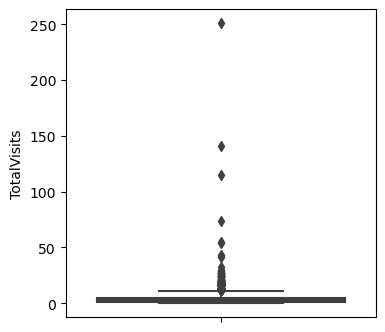

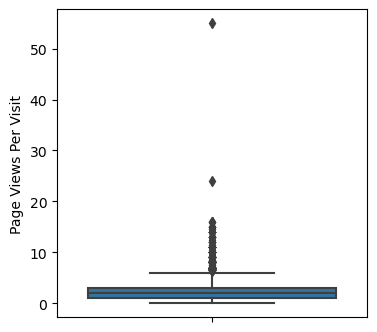

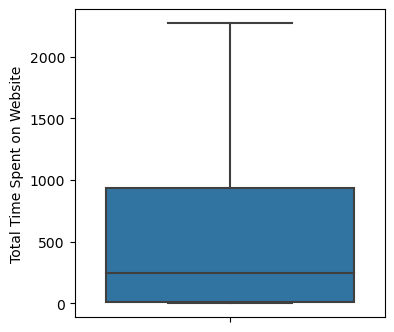

In [30]:
# Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

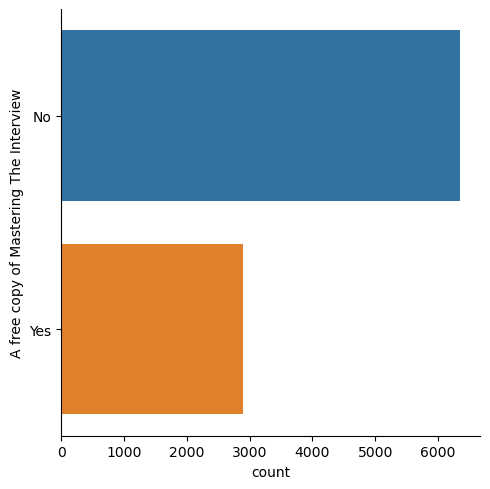

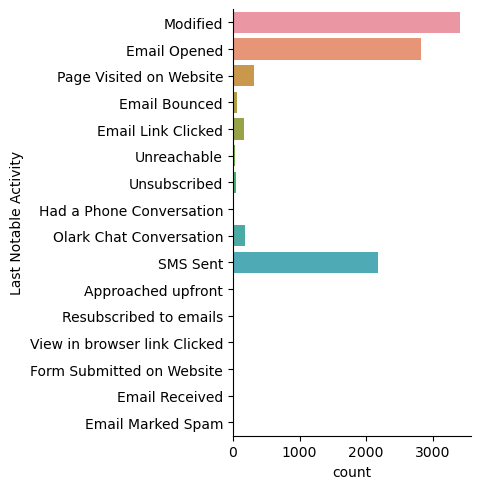

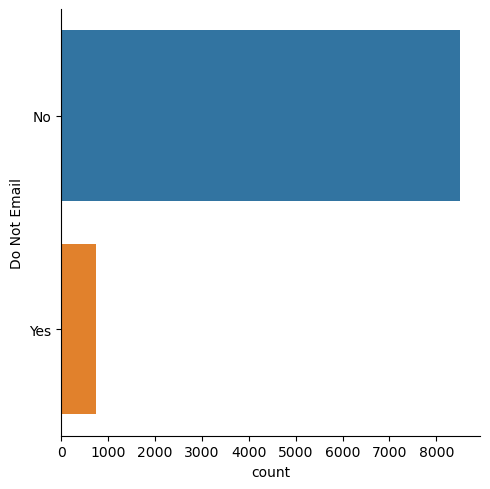

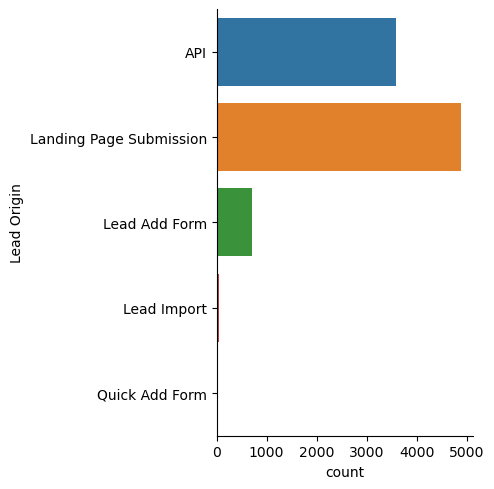

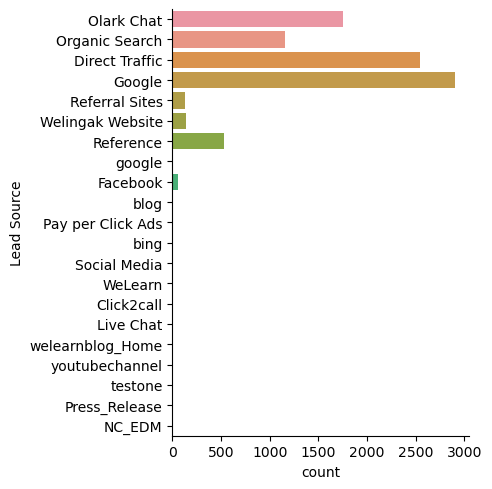

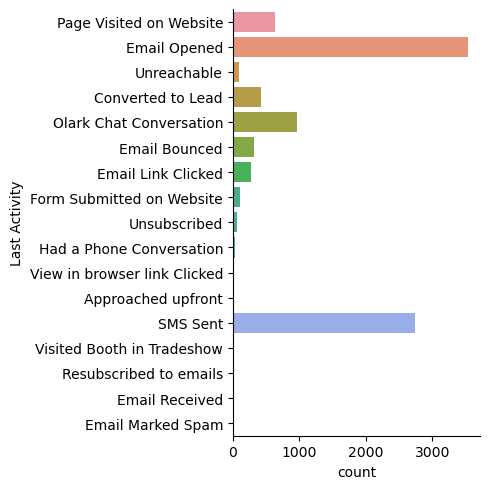

In [31]:
# Univariate Analysis of Numerical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

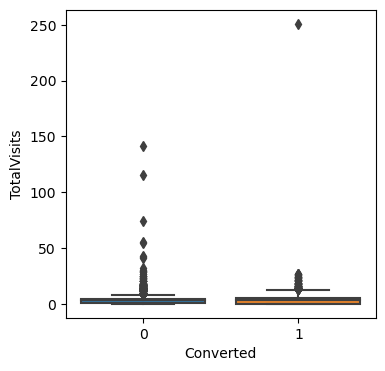

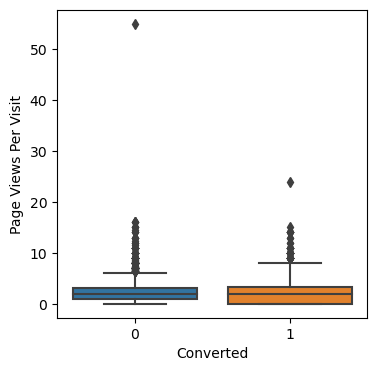

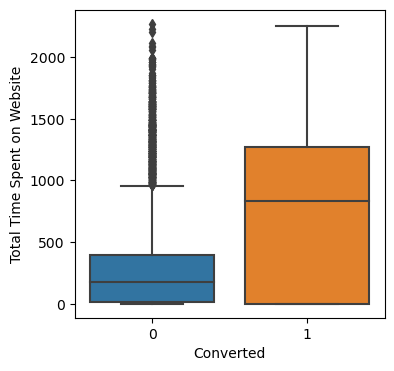

In [33]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

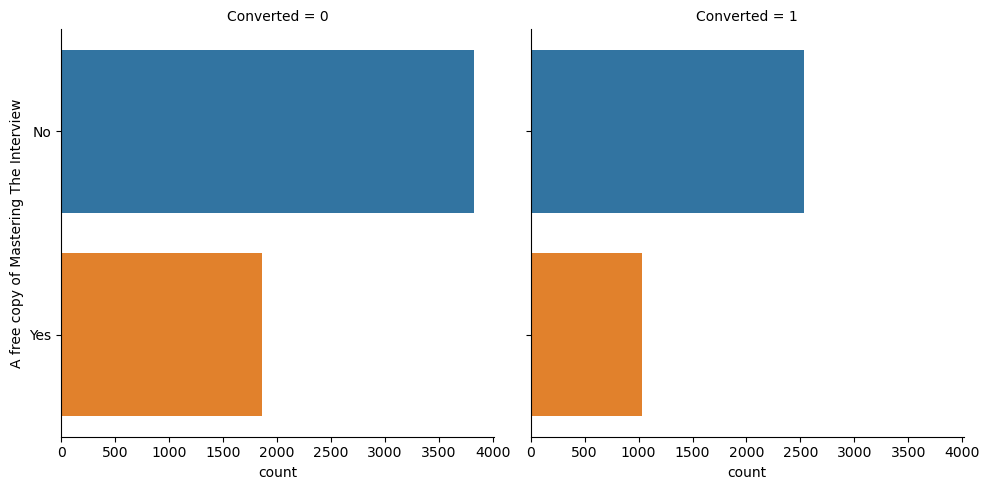

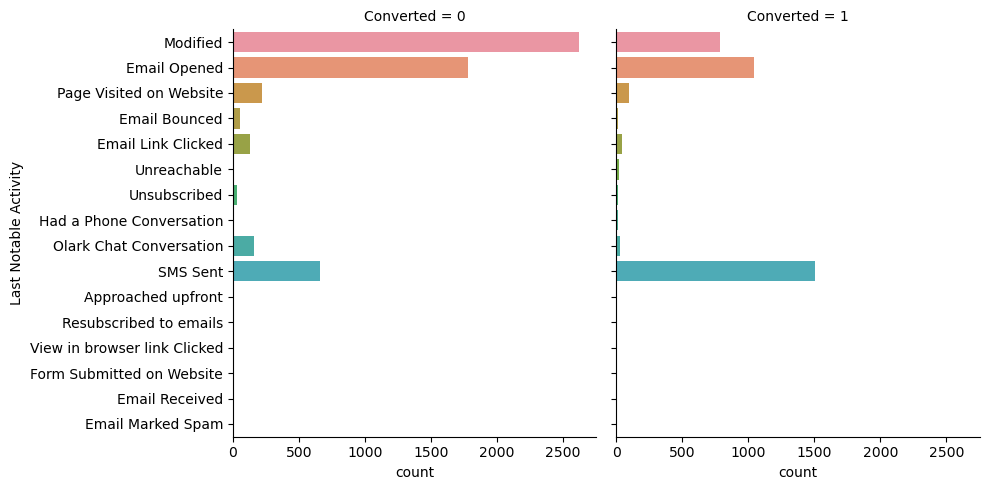

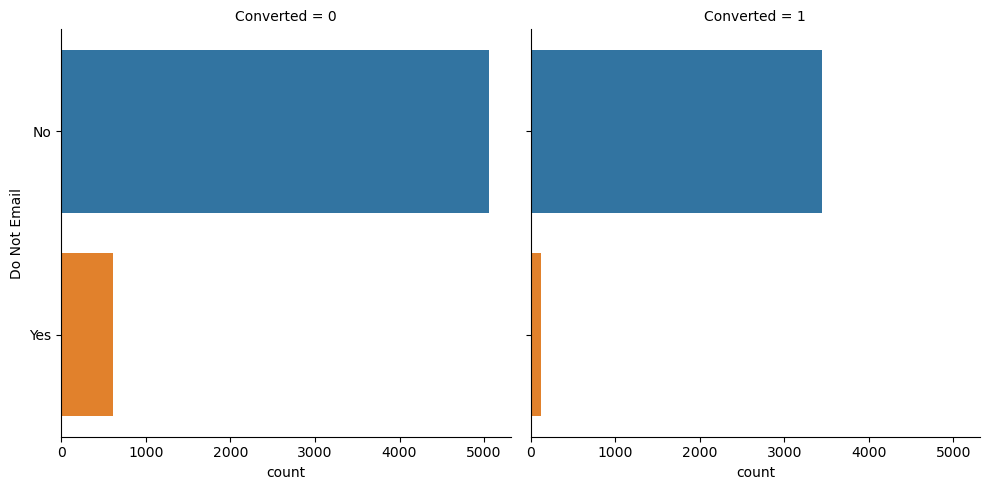

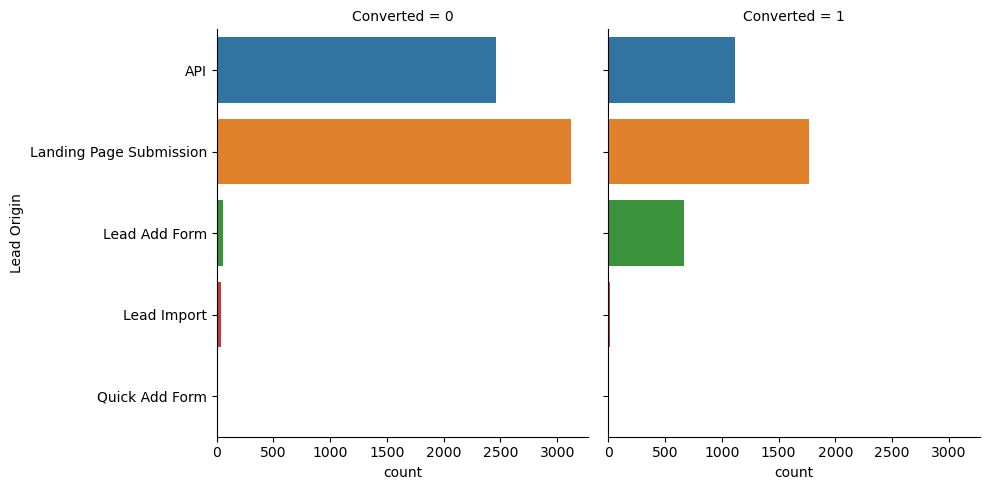

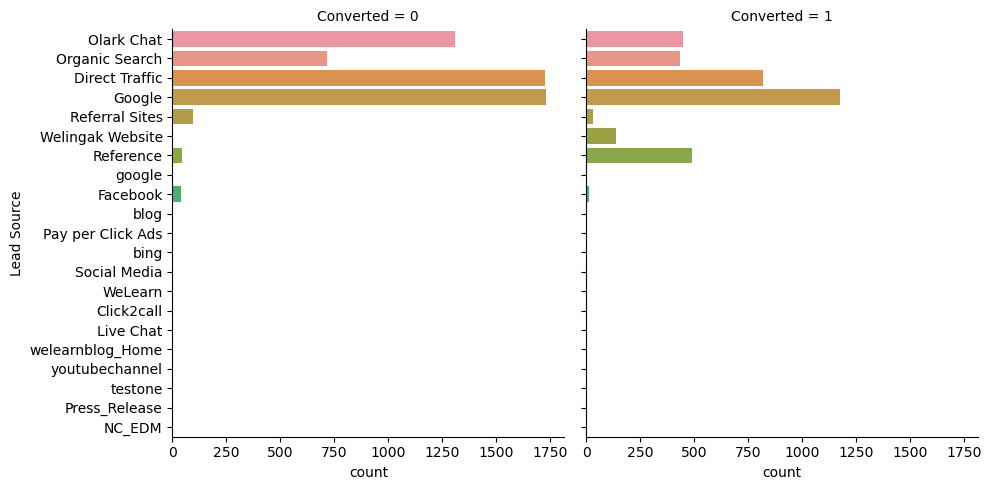

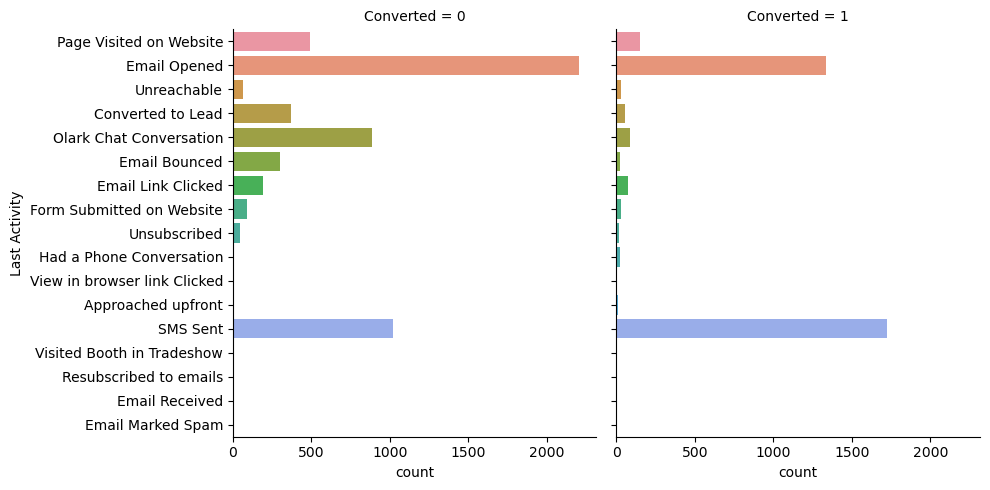

In [32]:
# Bivariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_bivariate_analysis('Converted',c)

<Axes: >

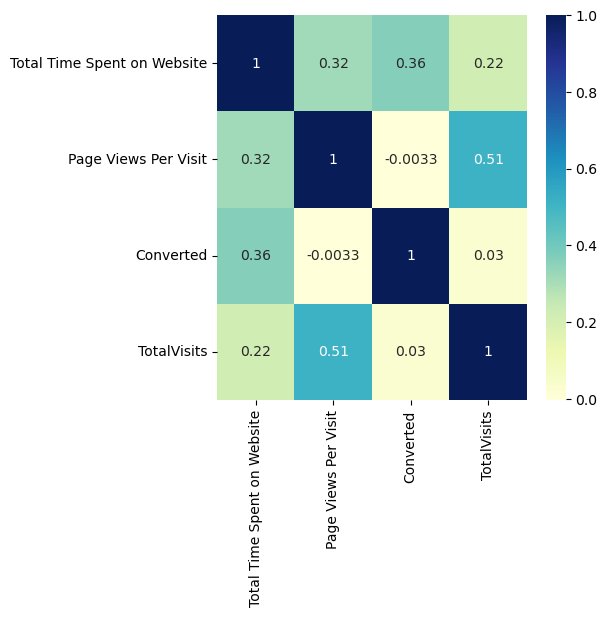

In [34]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(5, 5))
sns.heatmap(df_data.corr(), cmap="YlGnBu",annot=True)

**Summary**: Upon observing numerous plots above in EDA (I), we conclude the following points:

1.   Univariate Analysis Conclusion:
    *   There is low variation in *Page Views Per Visit* and	*TotalVisits*	but higher variation in *Total Time Spent on Website*
    *  There are a lot of outliers in *Page Views Per Visit* and	*TotalVisits* which needs to be treated before modelling

2.   Bivariate Analysis Conclusion:
    *   There is positive correlation between *Total Time Spent on Website* and *Conversion*
    *   There is come correlation between *Conversion* and some categorical columns like *Lead Origin* and *Lead Source*
    
3.   Correlation Analysis (Heatmap) Conclusion:
    *   There is positive correlation between *Total Time Spent on Website* and *Conversion*
    *   There is almost no correlation in *Page Views Per Visit* and	*TotalVisits* with *Conversion*




---



## Creating Dummy variables

In [35]:
# Listing out columns for creating dummy variables
df_data[list(categorical_column)].describe()

,A free copy of Mastering The Interview,Last Notable Activity,Do Not Email,Lead Origin,Lead Source,Last Activity
count,9240,9240,9240,9240,9240,9240
unique,2,16,2,5,21,17
top,No,Modified,No,Landing Page Submission,Google,Email Opened
freq,6352,3407,8506,4886,2904,3540


In [36]:
# Creating dummy varaiables and drop_first to avoid multicollinearity
df_data = pd.get_dummies(data=df_data, columns=list(categorical_column), drop_first=True)
del categorical_column
df_data_usable_columns = set(df_data.columns)

In [37]:
# Overview of Dataframe (Shape, Datatype)
print(f'Shape of Data: {df_data.shape}', end="\n\n")
print('Information of Data')
print(f'{df_data.info()}', end="\n\n")
# Overview of Dataframe (Description, % of NaN) 
print('Description of Data')
print(f'{df_data.describe()}', end="\n\n")
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Shape of Data: (9240, 61)

Information of Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Total Time Spent on Website                         int64  
 1   Page Views Per Visit                                float64
 2   Converted                                           int64  
 3   TotalVisits                                         float64
 4   A free copy of Mastering The Interview_Yes          uint8  
 5   Last Notable Activity_Email Bounced                 uint8  
 6   Last Notable Activity_Email Link Clicked            uint8  
 7   Last Notable Activity_Email Marked Spam             uint8  
 8   Last Notable Activity_Email Opened                  uint8  
 9   Last Notable Activity_Email Received                uint8  
 10  Last Notable Activity_Form Submitted on Website     uint8  
 

Total Time Spent on Website                   0.0
Page Views Per Visit                          0.0
Converted                                     0.0
TotalVisits                                   0.0
A free copy of Mastering The Interview_Yes    0.0
                                             ... 
Last Activity_SMS Sent                        0.0
Last Activity_Unreachable                     0.0
Last Activity_Unsubscribed                    0.0
Last Activity_View in browser link Clicked    0.0
Last Activity_Visited Booth in Tradeshow      0.0
Length: 61, dtype: float64



---



## Exploratory Data Analysis (II)

In [38]:
def bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count", height=2)
  plt.show()

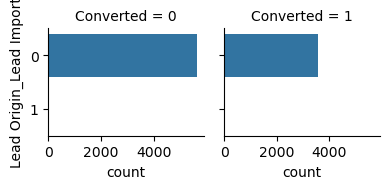

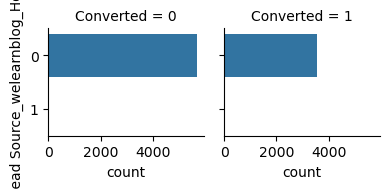

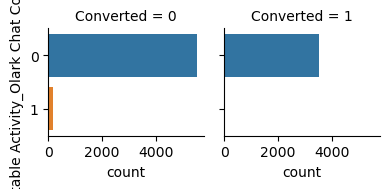

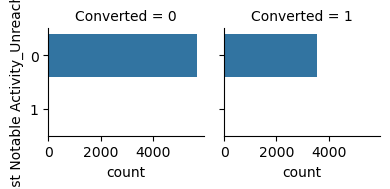

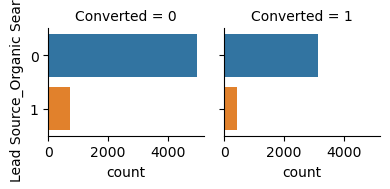

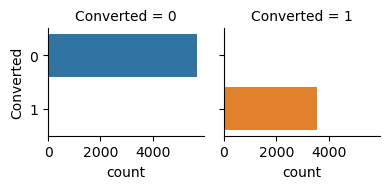

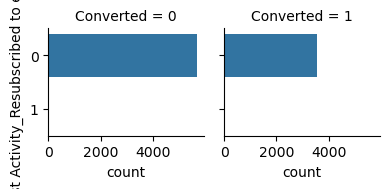

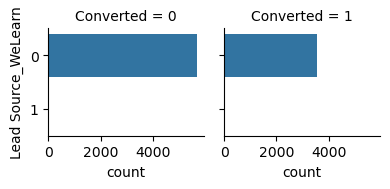

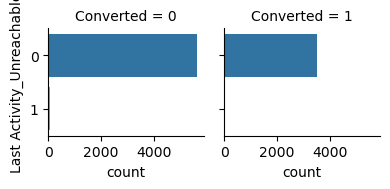

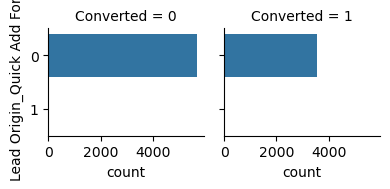

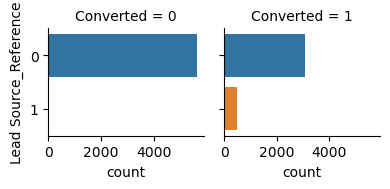

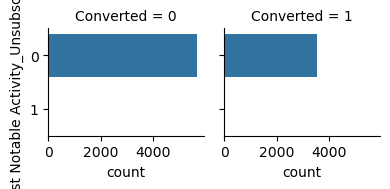

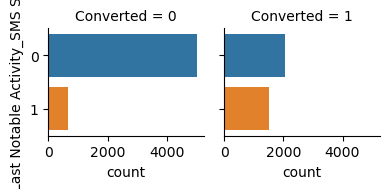

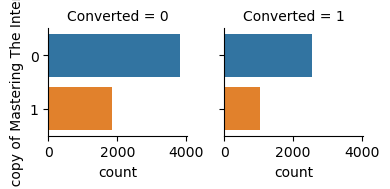

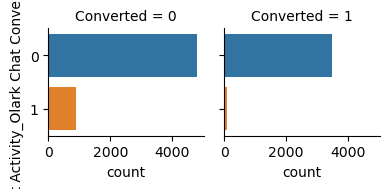

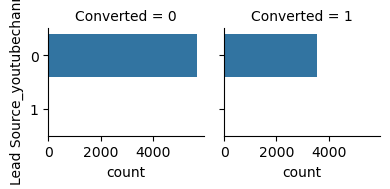

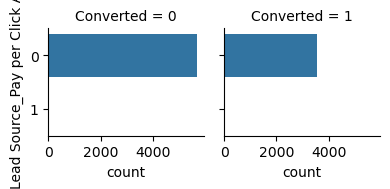

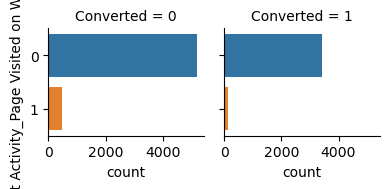

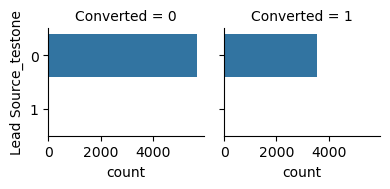

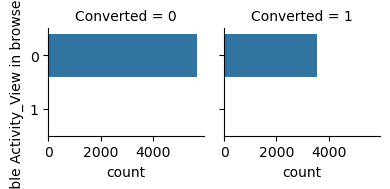

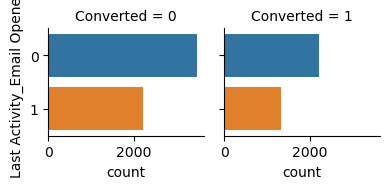

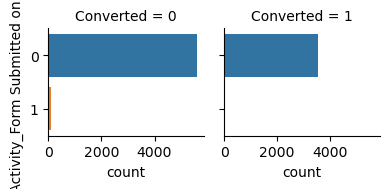

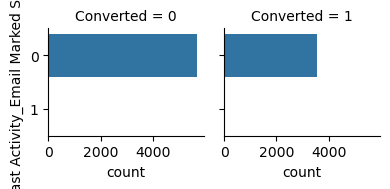

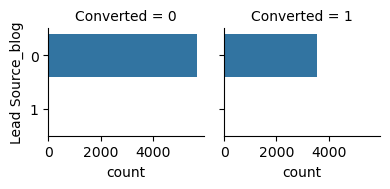

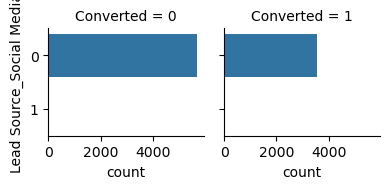

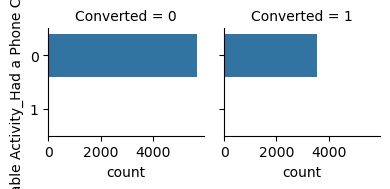

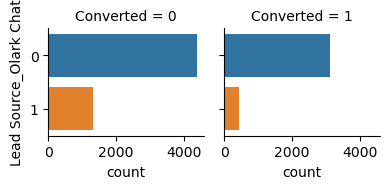

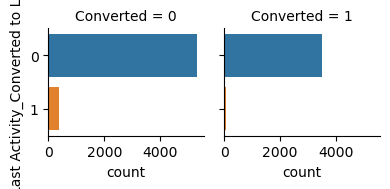

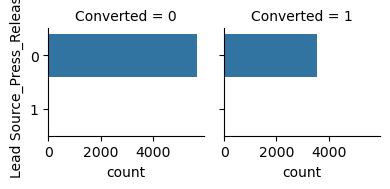

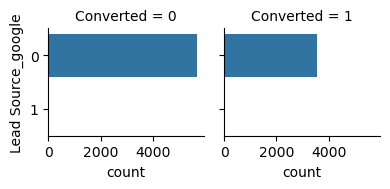

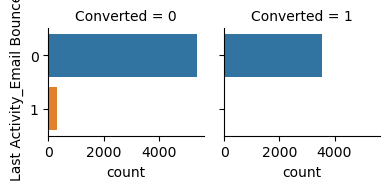

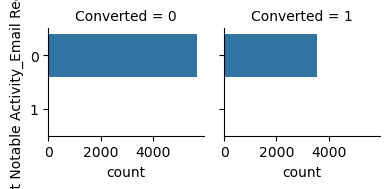

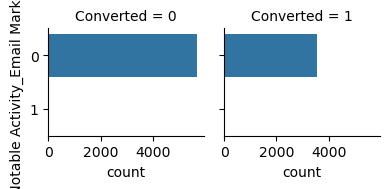

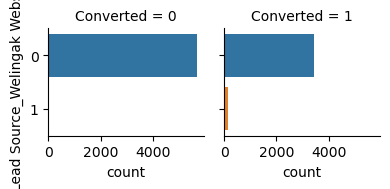

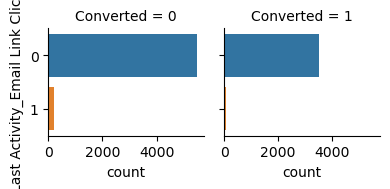

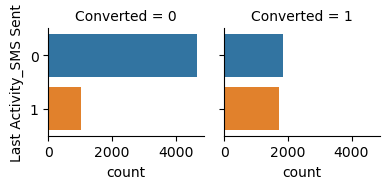

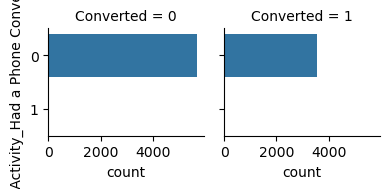

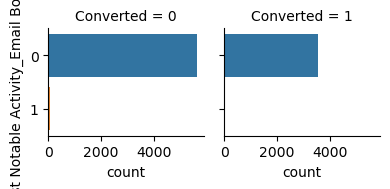

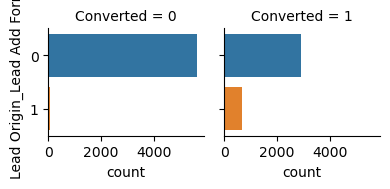

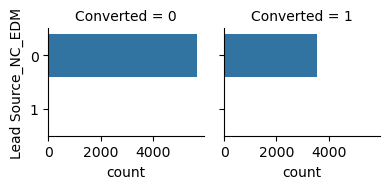

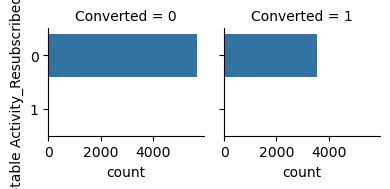

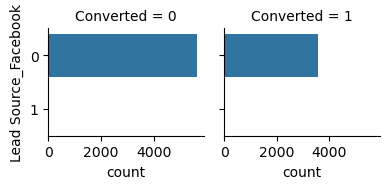

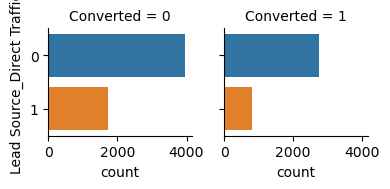

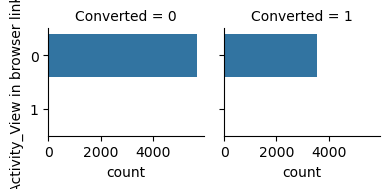

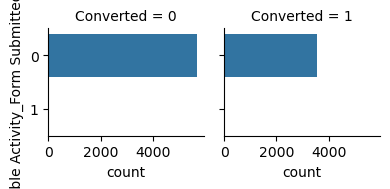

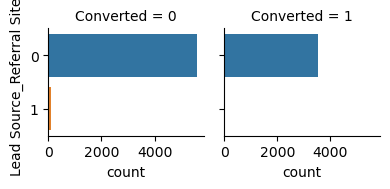

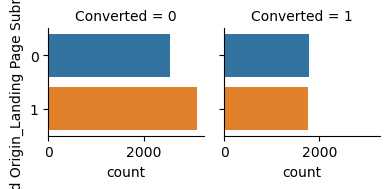

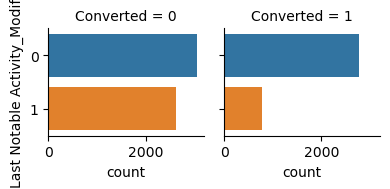

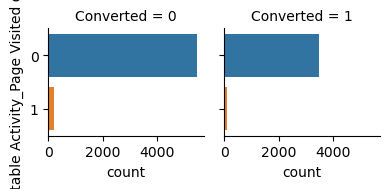

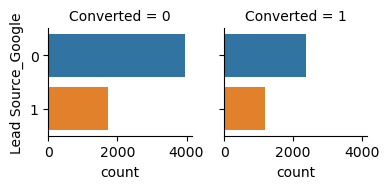

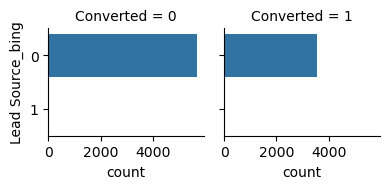

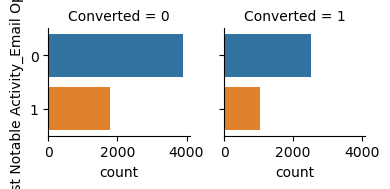

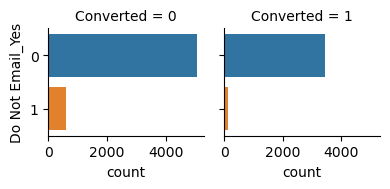

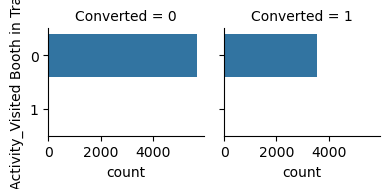

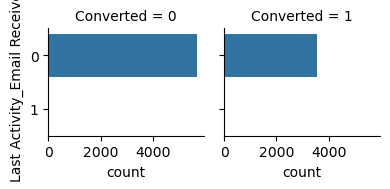

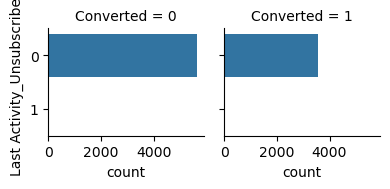

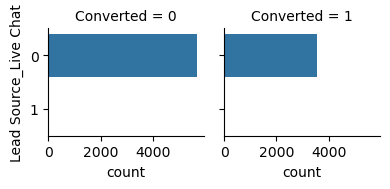

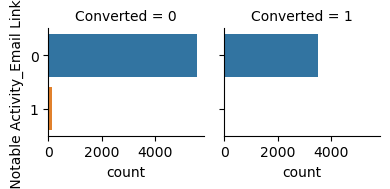

In [39]:
for c in df_data_usable_columns - numerical_column:
  bivariate_analysis('Converted',c)

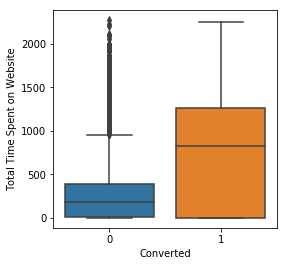

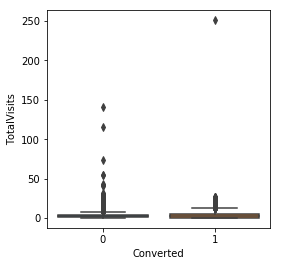

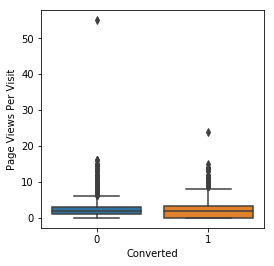

In [0]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

<Axes: >

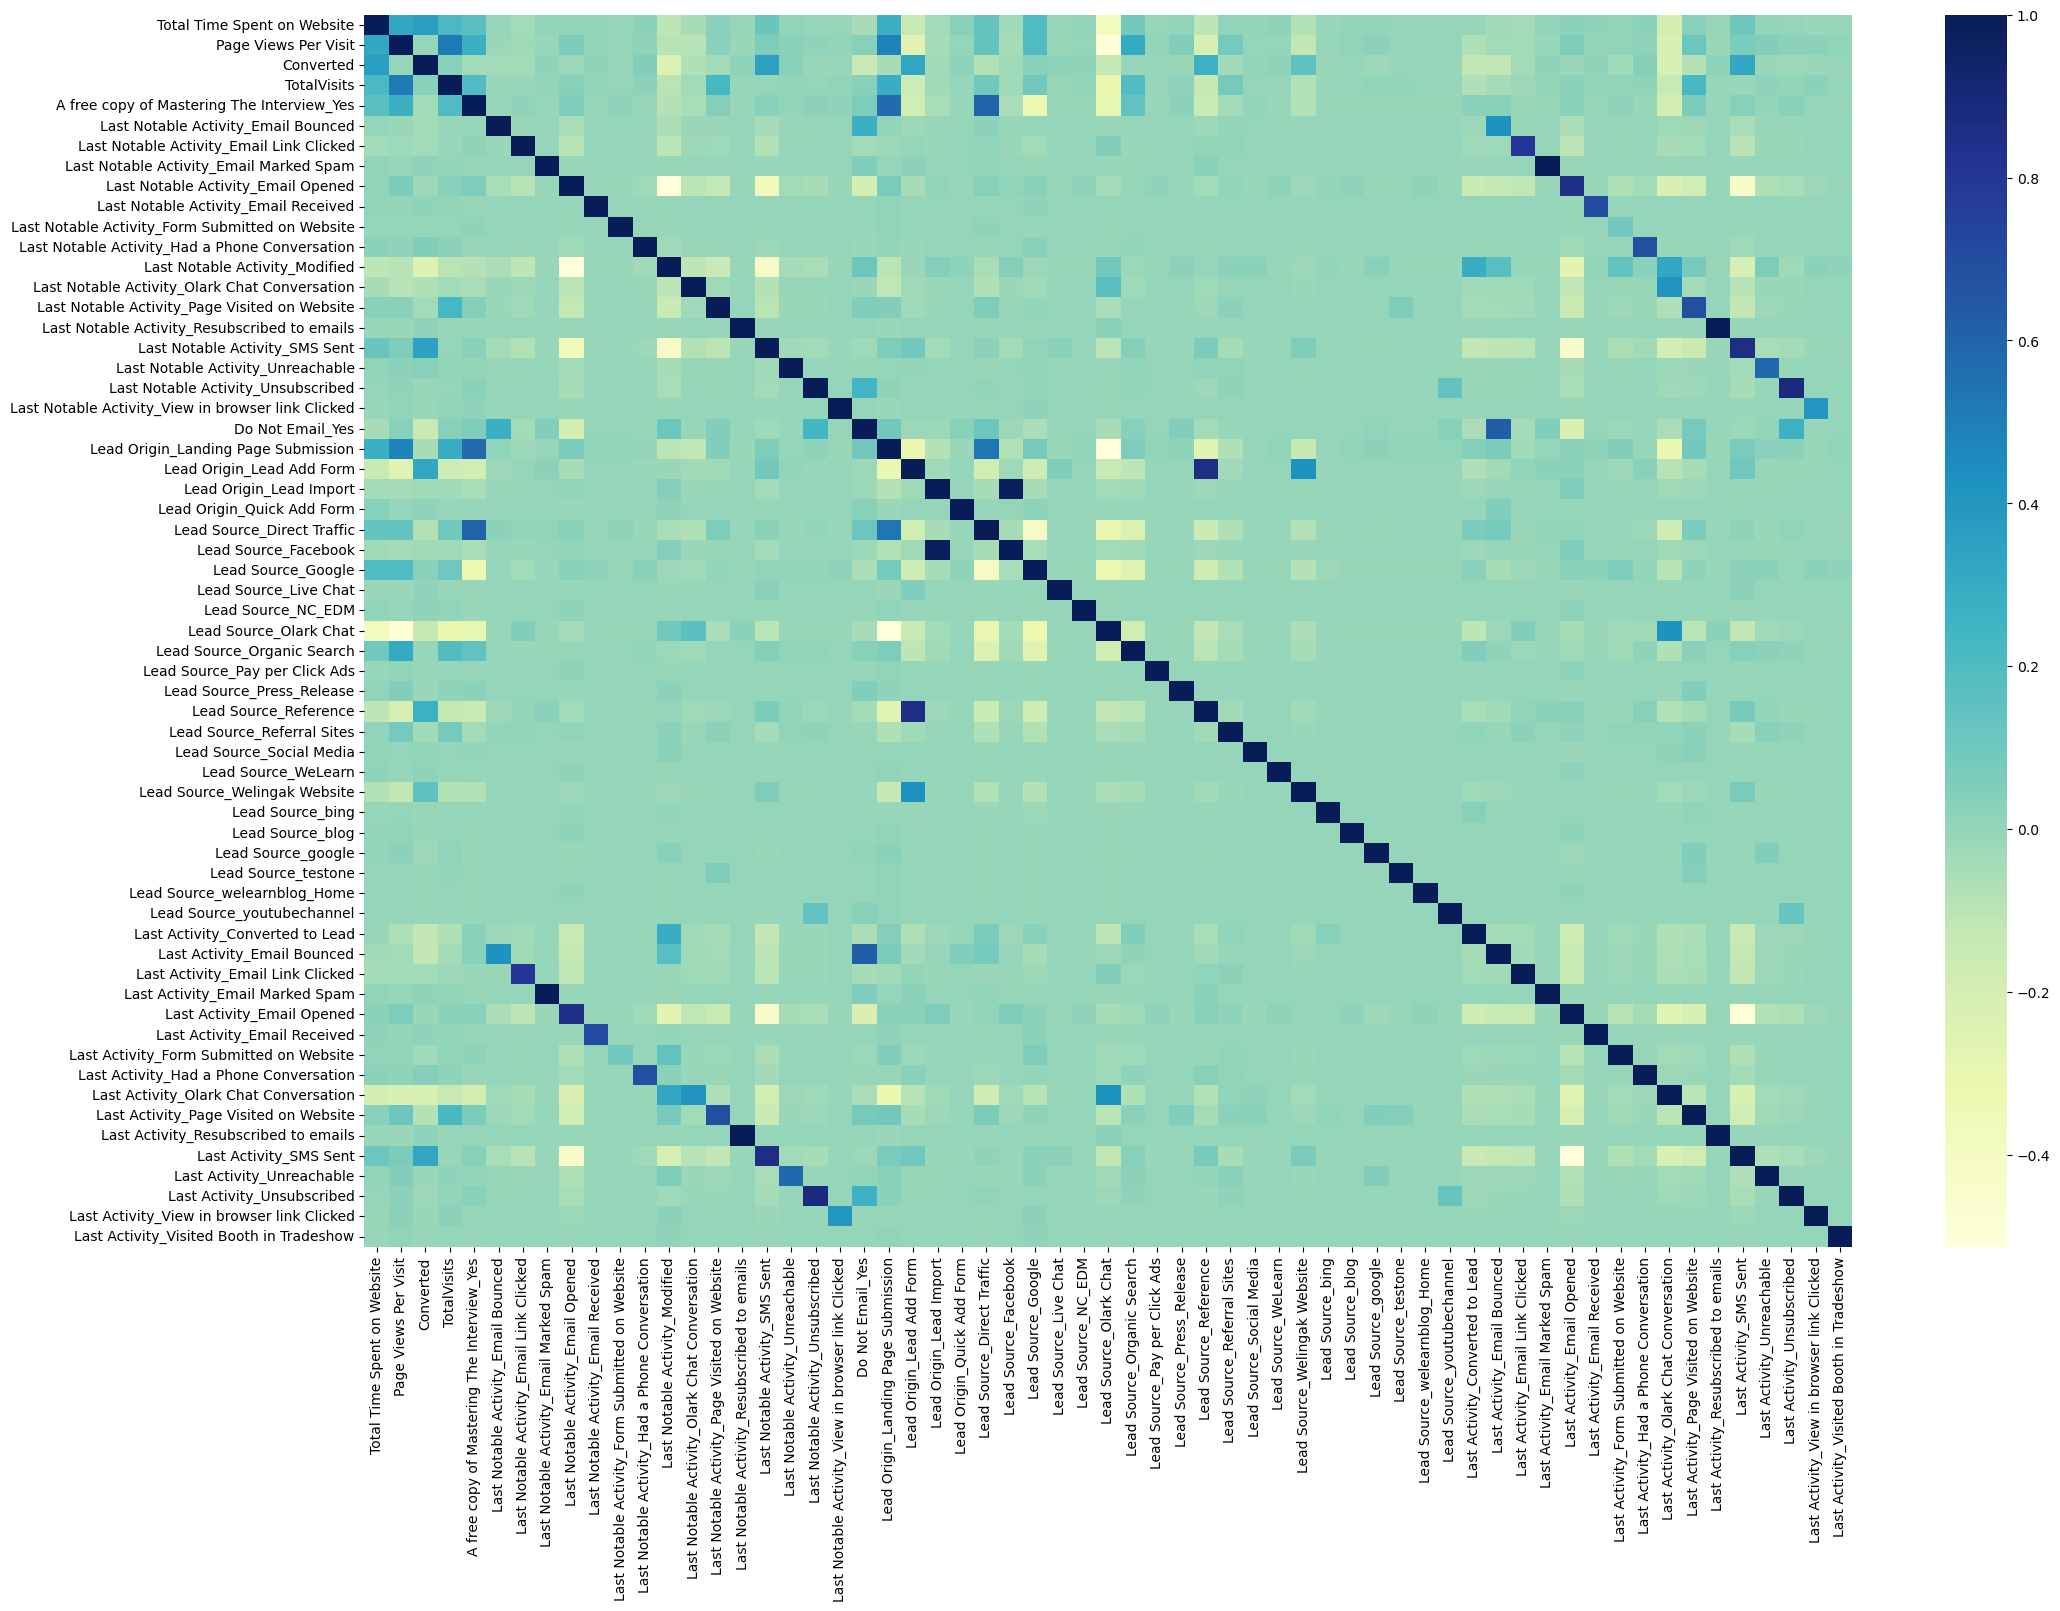

In [40]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(24, 16))
sns.heatmap(df_data.corr(), cmap="YlGnBu")

**Note**: Upon observing numerous plots above in EDA (II), we conclude the following points:

1.   Bivariate Analysis Conclusion: The following dummy variables seems to have some effect on *Conversion*:
    *   Lead Origin_Lead Add Form
    *   Last Activity_Email Bounced
    *   Lead Source_Reference
    *   Total Time Spent on Website

2.   Correlation Analysis (Heatmap) Conclusion: The heatmap is not very clear due to huge number of columns, however, we do see a lot of correlation amongst columns, especially dummy variables. Hence we would further reduce the number of columns so as to reluce multicollinearity.



---



## Outlier Treatment

In [41]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
z = np.abs(stats.zscore(df_data))
# Outlier Records
df_data_outliers = df_data[(z > 3).any(axis=1)]
# Outlier Removed Records
df_data_non_outliers = df_data[(z < 3).all(axis=1)]
df_data_non_outliers.head()

,Total Time Spent on Website,Page Views Per Visit,Converted,TotalVisits,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
1,674,2.5,0,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1532,2.0,1,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,1640,2.0,1,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0




---



## Feature Standardization / Normalization

In [42]:
# Normalising continuous features (numerical columns)
df = df_data_non_outliers[list(numerical_column)]
normalized_df=(df-df.mean())/df.std()
df_data_non_outliers.drop(columns=numerical_column,axis=1,inplace=True)
df_data_normal_non_outliers = pd.concat([df_data_non_outliers,normalized_df],axis=1)

print(f'Percentage of data retained: {100*(df_data_normal_non_outliers.shape[0]/df_data.shape[0]):.2}')
df_data_normal_non_outliers.head()

Percentage of data retained: 6.5e+01


,Converted,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,TotalVisits,Page Views Per Visit,Total Time Spent on Website
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.621490,0.046638,0.264746
2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.467274,-0.224659,1.796143
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.193117,-1.309847,-0.938240
6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.467274,-0.224659,1.988906
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.193117,-1.309847,-0.938240




---



## Splitting Data into Training and Test Sets

In [43]:
# Putting feature variable to X
X = df_data_normal_non_outliers.drop(['Converted'],axis=1)
# Putting response variable to y
y = df_data_normal_non_outliers['Converted']

y.head()

1    0
2    1
5    0
6    1
7    0
Name: Converted, dtype: int64

In [58]:

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3)
     



---



## Building Model
**NOTE: We will use Logistic Regression with RFE in order to build two suitable models as follows:**

1.   Model with Moderate Accuracy: To get wider range of audience to target upon (In case we have more resource to engage wider range of audience)
2.   Model with High Accuracy: To get narrow range of audience to target upon (In case we have less resource and want to minimize engagement)



## Building Model : Feature Selection using RFE for Logistic Regression

In [60]:
# Running RFE with the output number of the variable equal to 20


import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)            # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False  True False False False  True False  True
 False False  True  True False False False False False False False False
 False False False False False False False  True  True  True False False
 False  True False False  True False  True  True  True  True  True  True]


In [61]:

# Listing out the top 25 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Received', 'Last Notable Activity_Form Submitted on Website', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable', 'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Last Activ

In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def build_lr_model(col):
  print(f'Columns Count : {len(col)}')
  print(f'Columns : {col}')
  print('='*78)
  
  # Running the model using the selected variables
  X_train_sm = sm.add_constant(X_train[col])
  logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm4.fit()
  print(res.summary())
  
  # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
  print(f'Computing VIF values to keep track of multicollinearity')
  print('='*78)
  vif = pd.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif, end='\n'+'='*78+'\n')
  
  # Getting the predicted values on the train set
  y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
  # Creating a dataframe with the actual churn flag and the predicted probabilities
  y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
  y_train_pred_final['Lead_ID'] = y_train.index
  y_train_pred_final.head()
  
  # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
  y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
  # Let's check the overall accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's take a look at the confusion matrix again 
  confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
  draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  
def build_lr_model_advanced(col):
  
  print(f'Columns : {col}')
  print('='*78)
  
  # Running the model using the selected variables
  X_train_sm = sm.add_constant(X_train[col])
  logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm4.fit()
  print(res.summary())
  
  # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
  print(f'Computing VIF values to keep track of multicollinearity')
  print('='*78)
  vif = pd.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif, end='\n'+'='*78+'\n')
  
  # Getting the predicted values on the train set
  y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
  # Creating a dataframe with the actual churn flag and the predicted probabilities
  y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
  y_train_pred_final['Lead_ID'] = y_train.index
  y_train_pred_final.head()
  
  # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
  y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
  # Let's check the overall accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's take a look at the confusion matrix again 
  confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
  draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  
  # Let's create columns with different probability cutoffs 
  numbers = [float(x)/10 for x in range(10)]
  for i in numbers:
      y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
      
  # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
  cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
  from sklearn.metrics import confusion_matrix

  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
      cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1

      speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
  
  # Let's plot accuracy sensitivity and specificity for various probabilities.
  cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
  plt.show()
  
  # Ask for user input based on curve, for the cut-off value
  # cutoff = float(input('What should be the cut-off based on above plot (example 0.5)?'))
  print('Taking cut-off value as 0.35, from the plot above')
  cutoff = 0.35 # Taking value after observing graph
  
  y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > cutoff else 0)
  
  # Let's check the updated accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)}')
  print('='*78)
  
  # Let's check the Precision Score.
  print(f'Precision Score: {precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's check the Recall Score.
  print(f'Recall Score: {recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's plot Precision-Recall Curve
  p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  plt.plot(thresholds, p[:-1], "g-")
  plt.plot(thresholds, r[:-1], "r-")
  plt.show()
  # Ask for user input based on curve, for the cut-off value
  # cutoff = float(input('What should be the cut-off based on above plot (x-axis of intersection, generally)?'))
  print('Taking cut-off value as 0.42, from the plot above')
  cutoff = 0.42 # Taking value after observing graph
  
  # Making Prediction of Test Set
  X_test_sm = sm.add_constant(X_test[col])
  y_test_pred = res.predict(X_test_sm)
  y_pred_1 = pd.DataFrame(y_test_pred)
  # Converting y_test to dataframe
  y_test_df = pd.DataFrame(y_test)
  # Removing index for both dataframes to append them side by side 
  y_pred_1.reset_index(drop=True, inplace=True)
  y_test_df.reset_index(drop=True, inplace=True)
  # Appending y_test_df and y_pred_1
  y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
  # print(y_pred_final)
  # Renaming the column 
  y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})
  # Rearranging the columns
  y_pred_final = y_pred_final.reindex_axis(['Lead_ID','Converted','Conversion_Probability'], axis=1)
  y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > cutoff else 0)
  
  # Let's check the overall accuracy on Test set
  print(f'Overall accuracy on Test set: {metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)}')
  print('='*78)
  
  confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
  confusion2
  TP = confusion2[1,1] # true positive 
  TN = confusion2[0,0] # true negatives
  FP = confusion2[0,1] # false positives
  FN = confusion2[1,0] # false negatives
  # Let's see the sensitivity of our logistic regression model
  print(f'sensitivity of our logistic regression model: {TP / float(TP+FN)}')
  print('='*78)
  # Let's see the specificity of our logistic regression model
  print(f'specificity of our logistic regression model: {TN / float(TN+FP)}')
  print('='*78)

## Building Model using Logistic Regression

Columns Count : 30
Columns : ['Total Time Spent on Website', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Lead Source_Organic Search', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Email Link Clicked', 'Last Activity_SMS Sent', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Notable Activity_Email Opened', 'Last Notable

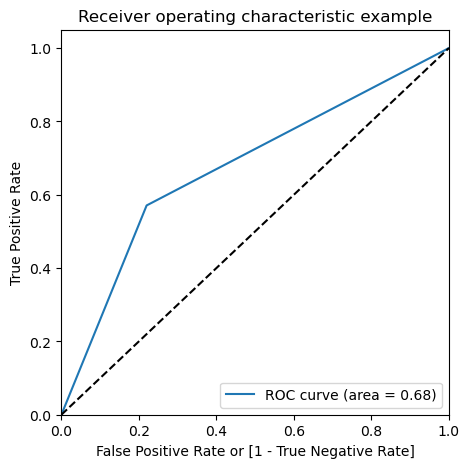

In [63]:
# MODEL 1
# Let's consider all 25 the columns suggested by RFE for our next model
selected_predictors = set(auto_selected_predictors)
removed_predictors = set()
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 30
Columns : ['Total Time Spent on Website', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Lead Source_Organic Search', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Email Link Clicked', 'Last Activity_SMS Sent', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Notable Activity_Email Opened', 'Last Notable

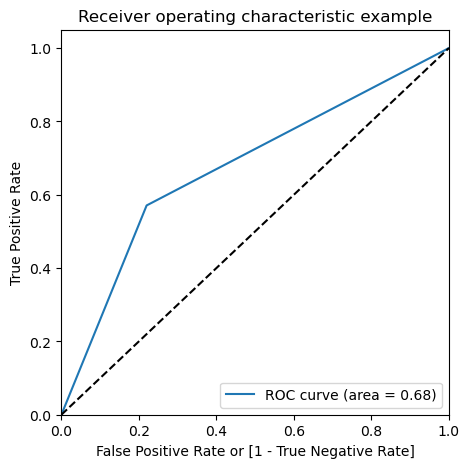

In [64]:
# MODEL 2
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Resubscribed to emails')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 23
Columns : ['Total Time Spent on Website', 'TotalVisits', 'Lead Source_Organic Search', 'Lead Source_Welingak Website', 'Last Activity_Page Visited on Website', 'Last Activity_Email Opened', 'Lead Source_Olark Chat', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_View in browser link Clicked', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Had a Phone Conversation', 'Lead Source_Google', 'Last Notable Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Unsubscribed', 'Last Activity_Email Received', 'Last Notable Activity_Modified', 'Last Activity_SMS Sent', 'Lead Source_bing', 'Last Activity_Olark Chat Conversation']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                         

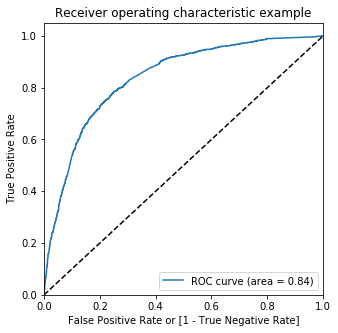

In [0]:
# MODEL 3
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Direct Traffic')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 29
Columns : ['Total Time Spent on Website', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Email Link Clicked', 'Last Activity_SMS Sent', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Had a Phone Conversa

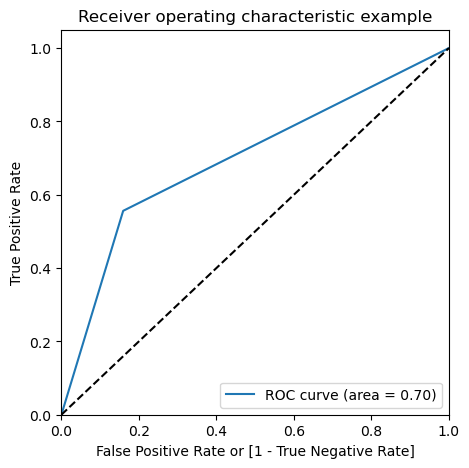

In [65]:
# MODEL 4
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Organic Search')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 28
Columns : ['Total Time Spent on Website', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Email Link Clicked', 'Last Activity_SMS Sent', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Last

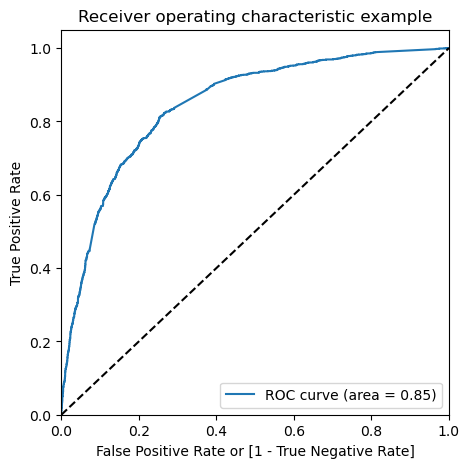

In [66]:
# MODEL 5
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Email Opened')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 28
Columns : ['Total Time Spent on Website', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Email Link Clicked', 'Last Activity_SMS Sent', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Last

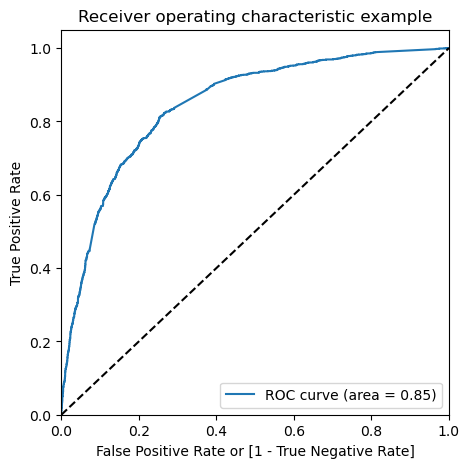

In [67]:
# MODEL 6
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Welingak Website')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 28
Columns : ['Total Time Spent on Website', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Email Link Clicked', 'Last Activity_SMS Sent', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Last

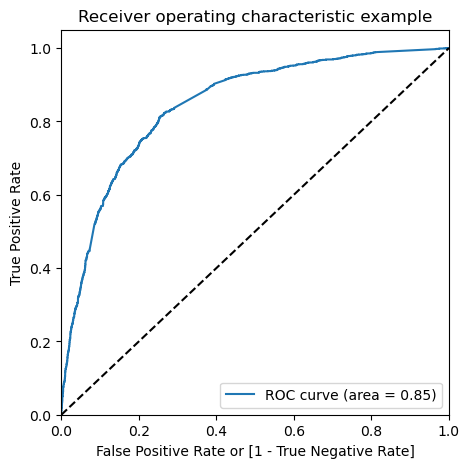

In [68]:
# MODEL 7
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Page Visited on Website')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 27
Columns : ['Total Time Spent on Website', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Email Link Clicked', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Last Activity_Unsubscribed', '

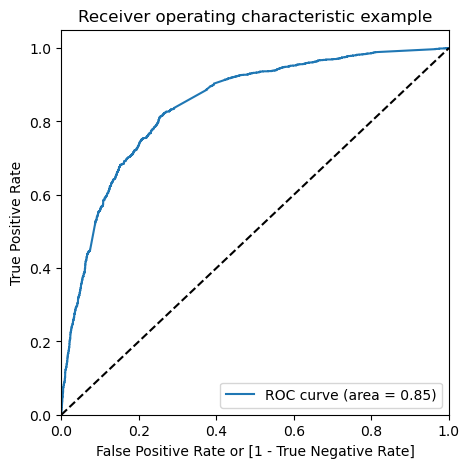

In [69]:
# MODEL 8
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_SMS Sent')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 27
Columns : ['Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Activity_Email Opened', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Modified', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Unsubscribed', '

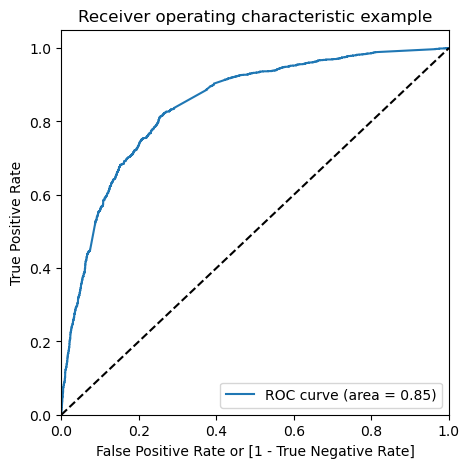

In [70]:
# MODEL 9
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_View in browser link Clicked')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 26
Columns : ['Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Activity_Email Opened', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Unsubscribed', 'Last Notable Activity_Email Link C

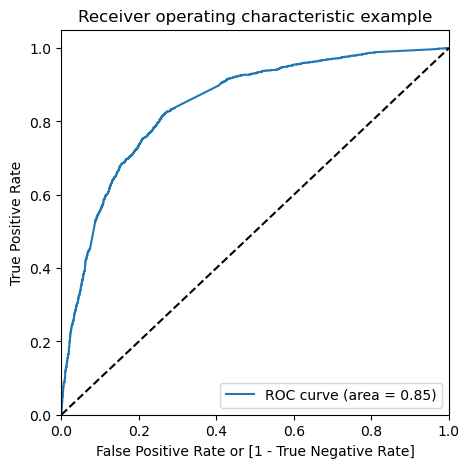

In [71]:
# MODEL 10
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Modified')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 25
Columns : ['Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Last Notable Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Unsubscribed', 'Last Notable Activity_Email Link Clicked']
                 Gene

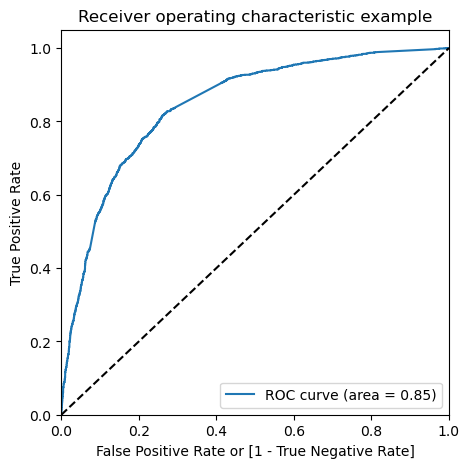

In [72]:
# MODEL 11
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Email Opened')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 24
Columns : ['Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Last Notable Activity_SMS Sent', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Unsubscribed', 'Last Notable Activity_Email Link Clicked']
                 Generalized Linear Model Regression Results       

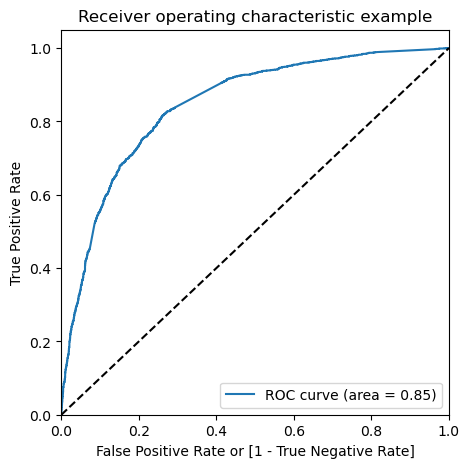

In [73]:
# MODEL 12
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('A free copy of Mastering The Interview_Yes')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 23
Columns : ['Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Last Notable Activity_SMS Sent', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Activity_Email Link Clicked', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Unsubscribed', 'Last Notable Activity_Email Link Clicked']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Con

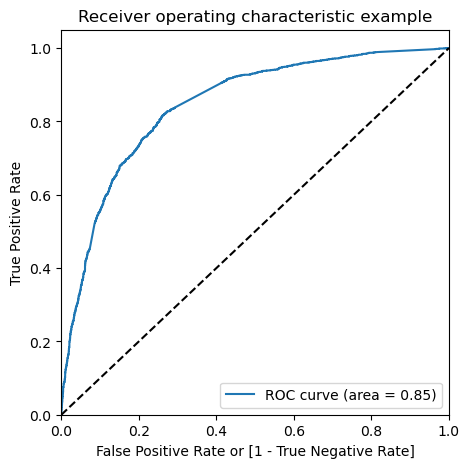

In [74]:
# MODEL 13
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Email Marked Spam')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 23
Columns : ['Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Last Notable Activity_SMS Sent', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Activity_Email Link Clicked', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Unsubscribed', 'Last Notable Activity_Email Link Clicked']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Con

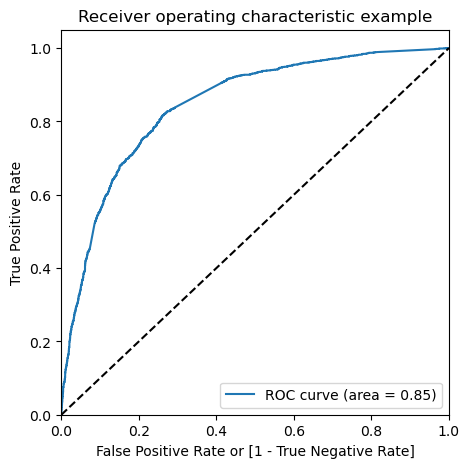

In [75]:
# MODEL 14
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Had a Phone Conversation')
build_lr_model(list(selected_predictors-removed_predictors))

**Note: VIF as well as accuracy looks fine, thus computing more metrics for this model.**

## Final Model Building and Analysis

Columns : ['Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable', 'Last Notable Activity_SMS Sent', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Had a Phone Conversation', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Notable Activity_Email Received', 'Last Activity_Email Link Clicked', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Resubscribed to emails', 'Lead Source_Direct Traffic', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Form Submitted on Website', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Page Visited on Website', 'Lead Source_Google', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Unsubscribed', 'Last Notable Activity_Email Link Clicked']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observ

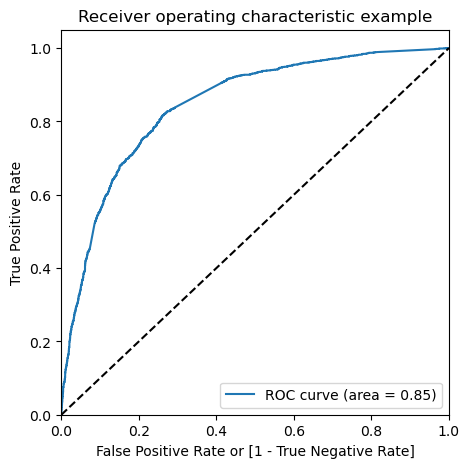

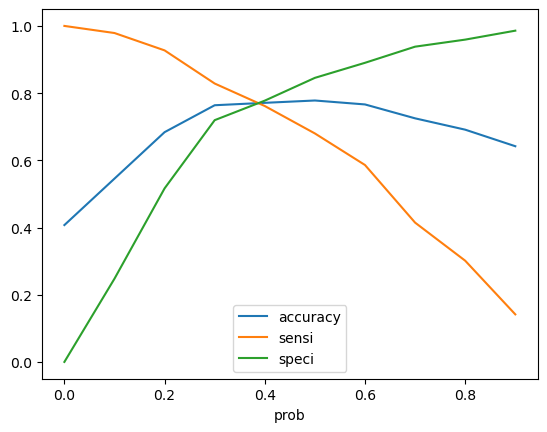

Taking cut-off value as 0.35, from the plot above
Overall accuracy: 0.7689547955034681
Precision Score: 0.7514600908500974
Recall Score: 0.6799765120375807


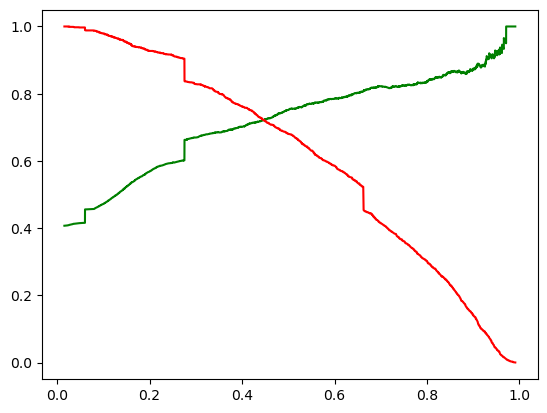

Taking cut-off value as 0.42, from the plot above


AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [76]:
# Building model again, and obtaining additional parameters like cut-off
# Making predictions on Test set using this final model
build_lr_model_advanced(list(selected_predictors-removed_predictors))

<Axes: >

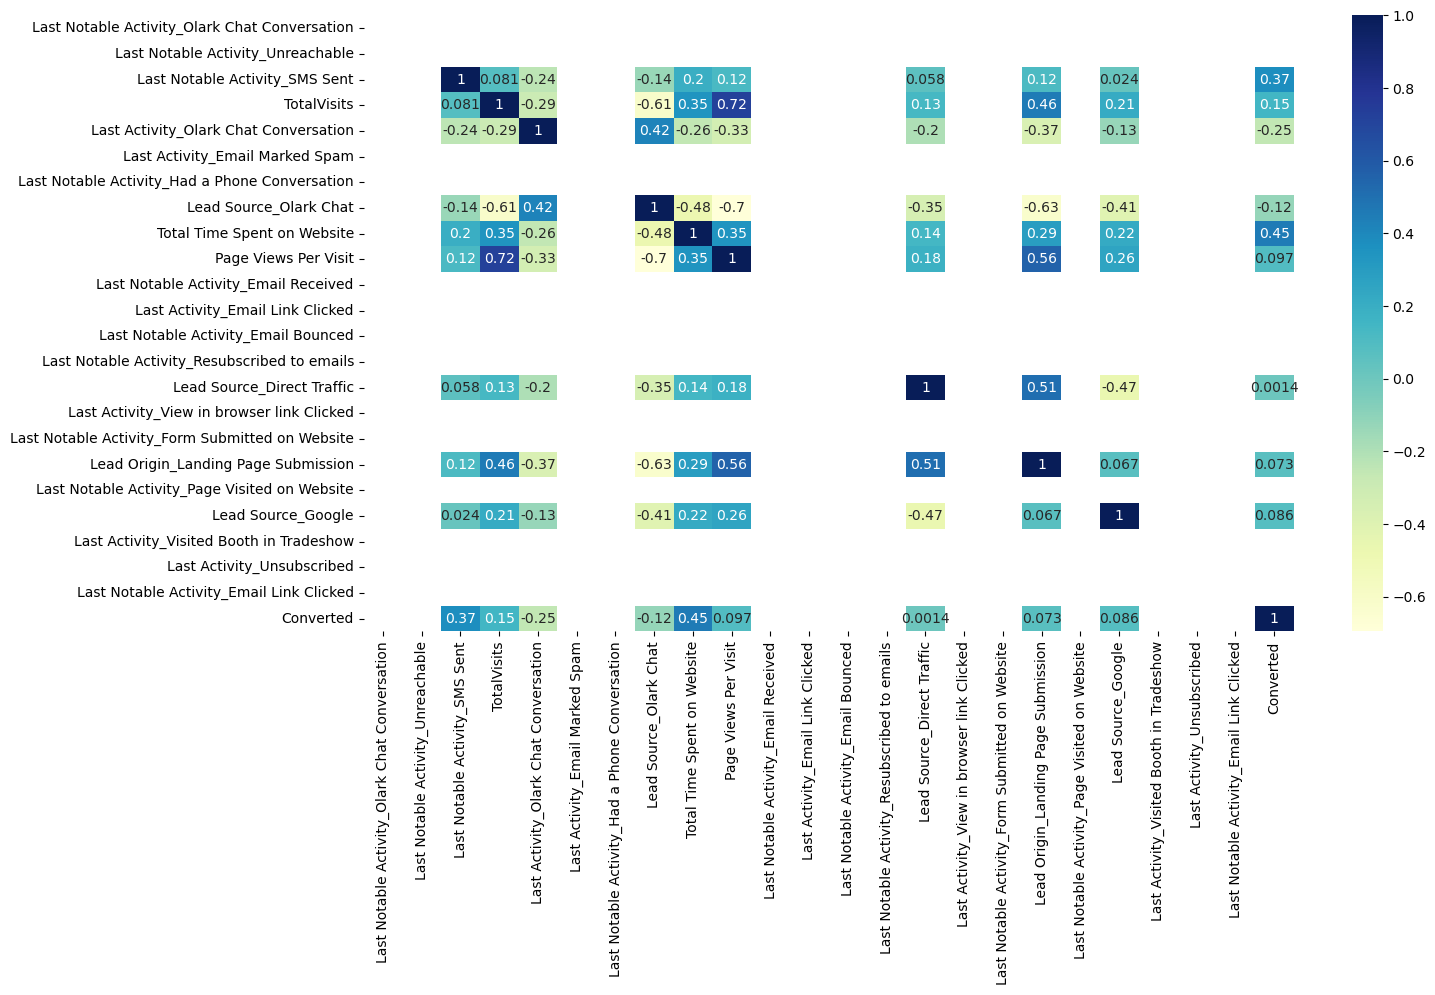

In [77]:
# Analysis of columns in our final model w.r.t. 'Converted'
col = list(selected_predictors-removed_predictors)
col.append('Converted')
plt.figure(figsize=(15, 8))
sns.heatmap(df_data_normal_non_outliers[col].corr(), cmap="YlGnBu",annot=True)

**Final Model Summary**:
    1. Overall accuracy on Test set: 0.786
    2. sensitivity of our logistic regression model: 0.733
    3. specificity of our logistic regression model: 0.823
    4. Top 3 variables in model, that contribute towards lead conversion are: 
        a. Total Time Spent on Website
        b. Last Notable Activity_SMS Sent
        c. TotalVisits
    5. Top 3 variables in my model, that should be focused are:
        a. Last Activity_SMS Sent (positively impacting)
        b. Last Activity_Olark Chat Conversation (negatively impacting)
        c. Lead Source_Olark Chat (negatively impacting)




---



## Verifying if sufficient accuracy is achieved using Logistic Regression
## Building Model Using PCA to Verify Model Accuracy
**NOTE: We are doing PCA to verify if our Logistic Regression model is good enough in terms of accuracy it is offering. PCA is NOT being used to build final model due to reasons below:**

1.   PCA would get us principal components and relating them to original attributes won't be intutive.
2.   Subjectively, PCA is not a good option to deal with categorical variables, and in our scenario, there are mostly categorical variables.





## Performing PCA Pre-Requisites

In [78]:
#Initializing the PCA module
pca = PCA(svd_solver='randomized', random_state=100)

In [79]:
#Doing the PCA on the train data
pca.fit(df_data_normal_non_outliers)

PCA(random_state=100, svd_solver='randomized')

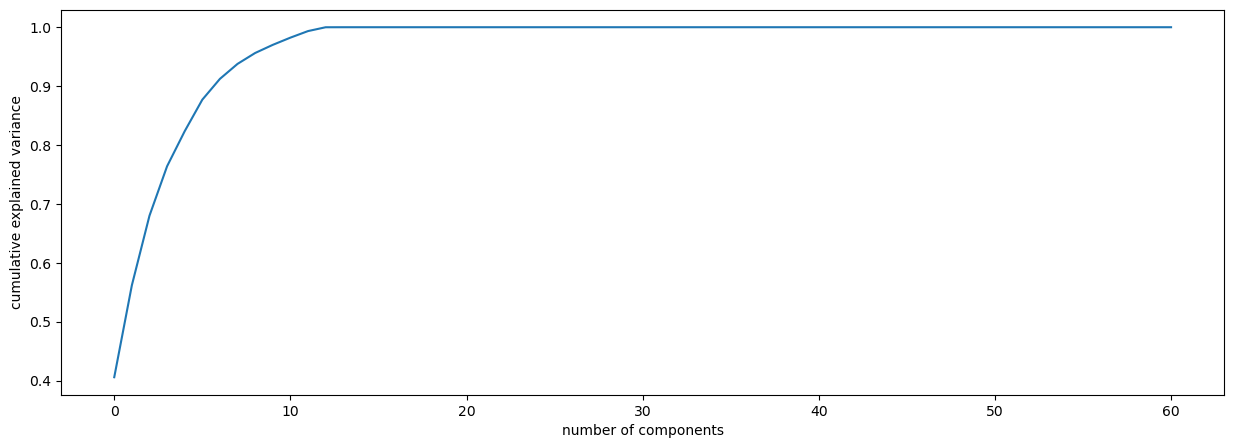

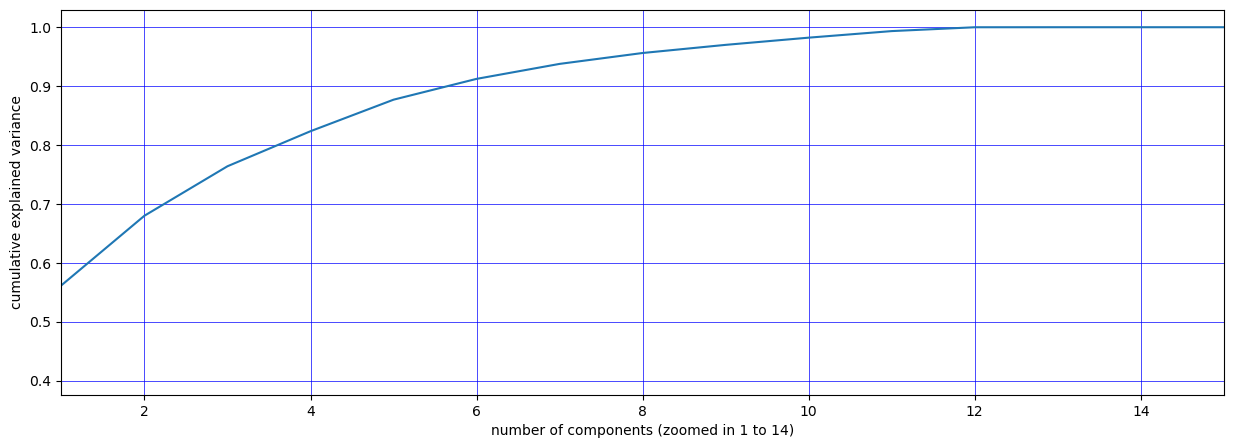

In [80]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components (zoomed in 1 to 14)')
plt.ylabel('cumulative explained variance')
plt.grid(color='b', linestyle='-', linewidth=.5)
plt.xlim(1,15)
plt.show()



---



## Performing PCA (Moderate Accuracy) with 75% Variance Cut-off
**USE CASE: This could help us identify larger number of probable hot leads and thus we can focus on larger audience, if we have bigger team to contact to hot leads individually on telephone calls.**

In [81]:
X_train.shape

(4181, 60)

In [82]:
# Since our dataset is large enough, we will use incremental PCA
pca_moderate = PCA(0.75)

In [83]:
df_train_pca_moderate = pca_moderate.fit_transform(X_train)
df_train_pca_moderate.shape
# PCA selected 5 components to explain 90% variance in data

(4181, 4)

In [84]:
# Training the Regression Model
learner_pca_moderate = LogisticRegression()
model_pca_lr_moderate = learner_pca_moderate.fit(df_train_pca_moderate,y_train)

In [85]:
df_test_pca_moderate = pca_moderate.transform(X_test)
df_test_pca_moderate.shape

(1792, 4)

In [86]:
#Making prediction on the test data
pred_proba_test_moderate = model_pca_lr_moderate.predict_proba(df_test_pca_moderate)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_moderate))

'0.77'



---



## Performing PCA (High Accuracy) with 90% Variance Cut-Off
**USE CASE: This could help us identify smaller number of probable hot leads and thus we can focus on smaller audience, if we have small team to contact to hot leads individually on telephone calls, thus reducing unnecessary calls to minimum.**

In [87]:
X_train.shape

(4181, 60)

In [88]:
# Since our dataset is large enough, we will use incremental PCA
pca_high = PCA(0.90)

In [89]:
df_train_pca_high = pca_high.fit_transform(X_train)
df_train_pca_high.shape
# PCA selected 7 components to explain 90% variance in data

(4181, 7)

In [90]:
# Training the Regression Model
learner_pca_high = LogisticRegression()
model_pca_lr_high = learner_pca_high.fit(df_train_pca_high,y_train)

In [91]:
df_test_pca_high = pca_high.transform(X_test)
df_test_pca_high.shape

(1792, 7)

In [92]:
#Making prediction on the test data
pred_proba_test_high = model_pca_lr_high.predict_proba(df_test_pca_high)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_high))

'0.82'



---



## Conclusion
1. Our Logistic Regression Model is decent and accurate enough, when compared to the model derived using PCA.
2. X Education Company needs to focus on following key aspects to improve the overall conversion rate:
        a. Increase user engagement on their website since this helps in higher conversion
        b. Increase on sending SMS notifications since this helps in higher conversion
        c. Get TotalVisits increased by advertising etc. since this helps in higher conversion
        d. Improve the Olark Chat service since this is affecting the conversion negatively

    